MAE:  51.58
RMSE: 81.21
R²:   0.940

📢 Previsão para o próximo fecho: 6446.31 USD


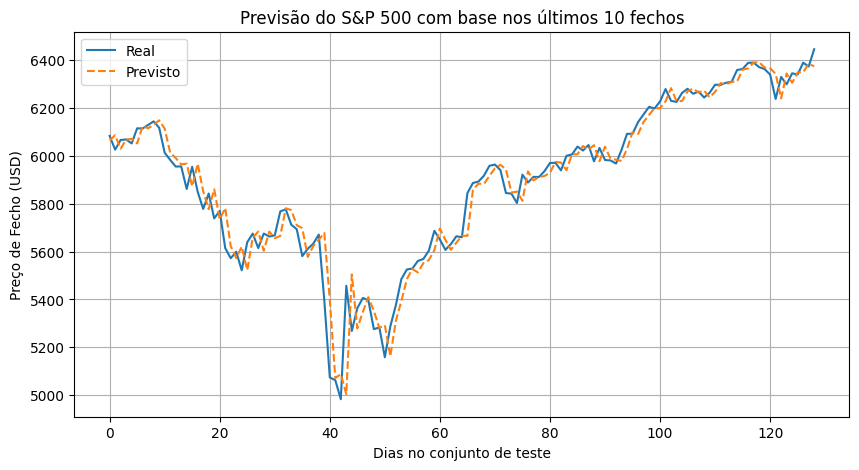

In [ ]:
# !pip install yfinance scikit-learn matplotlib -q

import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1) Dados do S&P 500 (fecho diário)
sp500 = yf.download("^GSPC", start="2023-01-01", auto_adjust=True, progress=False)
fechos = sp500["Close"].dropna().to_numpy(dtype=float).ravel()  # << garante 1D

# 2) Criar janelas deslizantes de 10 dias para prever o dia seguinte
janela = 10
X, y = [], []
for i in range(len(fechos) - janela):
    X.append(fechos[i:i+janela])     # shape (10,)
    y.append(fechos[i+janela])       # escalar

X = np.array(X, dtype=float)         # shape (n_amostras, 10)
y = np.array(y, dtype=float)         # shape (n_amostras,)

# 3) Treino/Teste (sem baralhar para respeitar a ordem temporal)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

# 4) Modelo
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# 5) Avaliação
y_pred = modelo.predict(X_test)
mae  = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2   = r2_score(y_test, y_pred)

print(f"MAE:  {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²:   {r2:.3f}")

# 6) Previsão do próximo fecho com base nos últimos 10 dias
ultimos_10 = fechos[-janela:]                     # shape (10,)
proxima_prev = modelo.predict(ultimos_10.reshape(1, -1))[0]
print(f"\n📢 Previsão para o próximo fecho: {proxima_prev:.2f} USD")

# 7) Visualização (real vs previsto no período de teste)
plt.figure(figsize=(10,5))
plt.plot(range(len(y_test)), y_test, label="Real")
plt.plot(range(len(y_pred)), y_pred, label="Previsto", linestyle="--")
plt.title("Previsão do S&P 500 com base nos últimos 10 fechos")
plt.xlabel("Dias no conjunto de teste")
plt.ylabel("Preço de Fecho (USD)")
plt.legend()
plt.grid(True)
plt.show()

